In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Hands On 1

In [0]:
#buat fungsi sigmoid
def sigmoid(x):
  return 1/ ( 1 + np.exp(-x))

In [0]:
#hyperparameter
epoch = 100
alpha = 0.01

In [0]:
#generate data
(x, y) = make_blobs(n_samples=250, n_features=2, centers=2, cluster_std=1.05)

In [5]:
x[:5]

array([[ 1.74231778, -8.80507375],
       [ 3.82863451, -9.24149745],
       [ 5.0712368 , -7.54255227],
       [ 1.10852317, -1.03913217],
       [ 4.56916215, -8.26001322]])

In [6]:
y[:5]

array([0, 0, 0, 1, 0])

In [0]:
#tambah bias term 
x = np.c_[np.ones((x.shape[0])), x]

In [8]:
x[:5]

array([[ 1.        ,  1.74231778, -8.80507375],
       [ 1.        ,  3.82863451, -9.24149745],
       [ 1.        ,  5.0712368 , -7.54255227],
       [ 1.        ,  1.10852317, -1.03913217],
       [ 1.        ,  4.56916215, -8.26001322]])

In [0]:
#inisialisasi w dan list lost
w = np.random.uniform(size=(x.shape[1],))
loss_history = []

In [10]:
#loop training sesuai epoch
for i in range(epoch):
  #hitung nilai prediksi
  pred = sigmoid(x.dot(w))

  #error
  error = pred - y

  #nilai loss
  loss = np.sum(error ** 2)

  #simpan nilai loss
  loss_history.append(loss)

  #hitung hasil
  print(f'epoch ke-{i+1}, nilai lossnya {loss}')

  #gradient
  gradient = x.T.dot(error) / x.shape[0]

  #update weight
  w = w - alpha*gradient

epoch ke-1, nilai lossnya 26.54316553685957
epoch ke-2, nilai lossnya 25.840578685952895
epoch ke-3, nilai lossnya 25.30116638177706
epoch ke-4, nilai lossnya 24.884172714835124
epoch ke-5, nilai lossnya 24.55950313860945
epoch ke-6, nilai lossnya 24.304798079168243
epoch ke-7, nilai lossnya 24.103334261488797
epoch ke-8, nilai lossnya 23.94252048168653
epoch ke-9, nilai lossnya 23.812815974977845
epoch ke-10, nilai lossnya 23.706948431383022
epoch ke-11, nilai lossnya 23.619344872669743
epoch ke-12, nilai lossnya 23.545714418946424
epoch ke-13, nilai lossnya 23.4827400942617
epoch ke-14, nilai lossnya 23.427849452861032
epoch ke-15, nilai lossnya 23.379042603475686
epoch ke-16, nilai lossnya 23.334762347450614
epoch ke-17, nilai lossnya 23.29379544948111
epoch ke-18, nilai lossnya 23.255197093424655
epoch ke-19, nilai lossnya 23.218232728492502
epoch ke-20, nilai lossnya 23.182333049548436
epoch ke-21, nilai lossnya 23.147058962516525
epoch ke-22, nilai lossnya 23.11207418863416
epoch

# Hands On 2

In [0]:
#untuk melihat gambar
def show_img(img):
  img = img.reshape((28,28))
  plt.imshow(img)

In [12]:
#download datasat
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [0]:
y_train[:1]

array([5], dtype=uint8)

In [0]:
#reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#one hot encoding
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [0]:
x_train[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [0]:
y_train[:1]

array([5], dtype=uint8)

In [0]:
#buat arsitektur jaringan
model = tf.keras.Sequential()

#tambah layer (hidden layer)
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

#tambah layer (output layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
accuracy_history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2917 - acc: 0.9124 - val_loss: 0.1318 - val_acc: 0.9598
Epoch 2/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1026 - acc: 0.9690 - val_loss: 0.1085 - val_acc: 0.9688
Epoch 3/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.0678 - acc: 0.9787 - val_loss: 0.0852 - val_acc: 0.9744
Epoch 4/10
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0475 - acc: 0.9852 - val_loss: 0.0871 - val_acc: 0.9742
Epoch 5/10
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0391 - acc: 0.9873 - val_loss: 0.0964 - val_acc: 0.9744
Epoch 6/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0305 - acc: 0.9904 - val_loss: 0.0853 - val_acc: 0.9778
Epoch 7/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0265 - acc: 0.9916 - val_loss: 0.

In [0]:
list(list(accuracy_history.history.values())[1])[1]

0.96902084

In [0]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)

0.9787


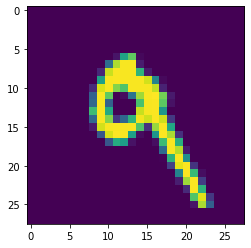

In [0]:
show_img(x_test[7])

In [0]:
np.argmax(model.predict(x_test[[7]]))

9

In [0]:
x_test[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
def select_group(arg):
  grup = arg % 6
  return grup + 1

In [0]:
select_group(3)

4

In [0]:
#cross validation
#cara pertama menggunakan y_train nggak di one hot tapi loss fnction diganti sparse_categorical_crossentropy.
cv_scores = []
kfold = StratifiedKFold(n_splits=10, shuffle=True)

for train, test in kfold.split(x_train, y_train):
  #buat arsitektur jaringan
  model_2 = tf.keras.Sequential()

  #tambah layer (hidden layer)
  model_2.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
  model_2.add(tf.keras.layers.Dense(256, activation='relu'))
  model_2.add(tf.keras.layers.Dense(128, activation='relu'))
  model_2.add(tf.keras.layers.Dense(64, activation='relu'))
  model_2.add(tf.keras.layers.Dense(32, activation='relu'))

  #tambah layer (output layer)
  model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

  #compile model
  model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model_2.fit(x_train[train], y_train[train], epochs=10, batch_size=128, verbose=0)

  scores = model_2.evaluate(x_train[test], y_train[test], verbose=0)
  print(f'acc : {scores}')

acc : [0.09864741335428359, 0.9751915]
acc : [0.08973571643824471, 0.97851074]
acc : [0.09150487105792394, 0.97867024]
acc : [0.0945521057449805, 0.97683334]
acc : [0.1384736600127459, 0.9701667]
acc : [0.07926393453894598, 0.97982997]
acc : [0.07857019357173654, 0.98316383]
acc : [0.11193407057626835, 0.9746624]


In [0]:
#cross validation
#cara kedua menggunakan y_train di one hot di dalam looping dan loss function tetap.
cv_scores = []
kfold = StratifiedKFold(n_splits=10, shuffle=True)

for train, test in kfold.split(x_train, y_train):
  y_train_train = tf.keras.utils.to_categorical(y_train[train], 10)
  y_train_test = tf.keras.utils.to_categorical(y_train[test], 10)
  model.fit(x_train[train], y_train_train, epochs=10, batch_size=128, verbose=0)

  scores = model.evaluate(x_train[test], y_train_test, verbose=0)
  print(f'accuracynya {scores[1]}')

accuracynya 0.9781884551048279
accuracynya 0.9861735701560974
accuracynya 0.9948341846466064
accuracynya 0.9978333115577698
accuracynya 0.996999979019165
accuracynya 0.994832456111908
accuracynya 0.9986664652824402
accuracynya 0.9996666312217712
accuracynya 0.997665524482727
accuracynya 0.9996664524078369


In [0]:
gx_train[1]